# Projeto de Regressão Logística


Neste projeto estaremos trabalhando com um conjunto de dados falso de publicidade, indicando se um usuário de internet específico clicou ou não em uma propaganda. Vamos tentar criar um modelo que preveja se clicará ou não em um anúncio baseado nos recursos desse usuário.

Este conjunto de dados contém os seguintes recursos:

* 'Daily Time Spent on Site': tempo no site em minutos.
* 'Age': idade do consumidor.
* 'Area Income': Média da renda do consumidor na região.
* 'Daily Internet Usage': Média em minutos por di que o consumidor está na internet.
* 'Linha do tópico do anúncio': Título do anúncio.
* 'City': Cidade do consumidor.
* 'Male': Se o consumidor era ou não masculino.
* 'Country': País do consumidor.
* 'Timestamp': hora em que o consumidor clicou no anúncio ou janela fechada.
* 'Clicked on Ad'': 0 ou 1 indicam se clicou ou não no anúncio.

## Importar bibliotecas

**Importe algumas bibliotecas que você acha que você precisará**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as sk

## Obter dados
**Leia o arquivo advertising.csv e grave-o em um DataFrame chamado ad_data.**

In [46]:
ad_data = pd.read_csv('advertising.csv')
ad_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


**Verifique o cabeçalho do ad_data**

In [35]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Use info() e describe() em ad_data**

In [36]:
#ad_data.info()
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Análise de dados exploratória

Vamos usar Seaborn para explorar os dados!

Tente recriar os gráficos abaixo.

**Crie um histograma de "Age"**

<AxesSubplot:xlabel='Age', ylabel='Count'>

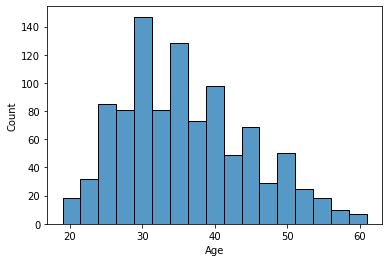

In [37]:
sns.histplot(data=ad_data, x='Age')

**Crie um joinplot mostrando "Area Income" versus "Age"**

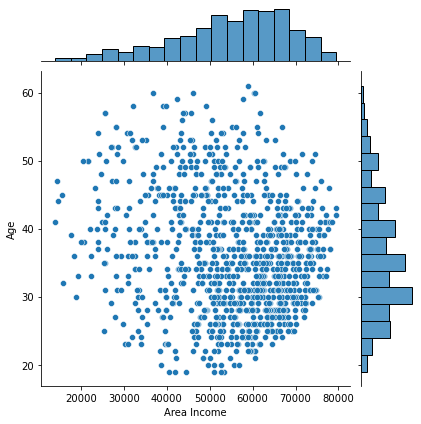

In [38]:
sns.jointplot(data=ad_data, x="Area Income", y="Age")

**Crie um jointplot que mostre as distribuições KDE do "Daily Time spent" no site vs "Age".**

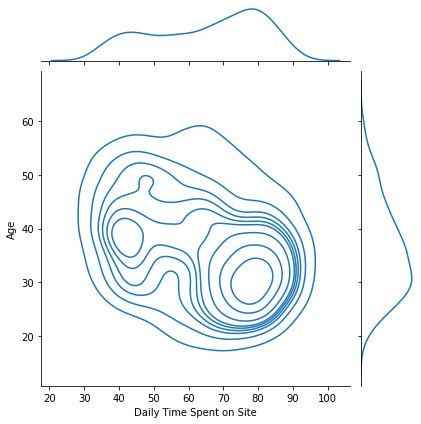

In [39]:
sns.jointplot(data=ad_data, x="Daily Time Spent on Site", y="Age", kind="kde")

**Crie um jointplot do 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

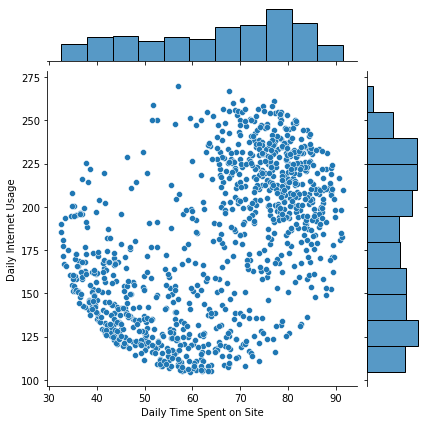

In [40]:
sns.jointplot(data=ad_data, x="Daily Time Spent on Site", y="Daily Internet Usage")

**Finalmente, crie um parplot com o matiz definido pelo recurso de coluna 'Clicked on Ad'.**

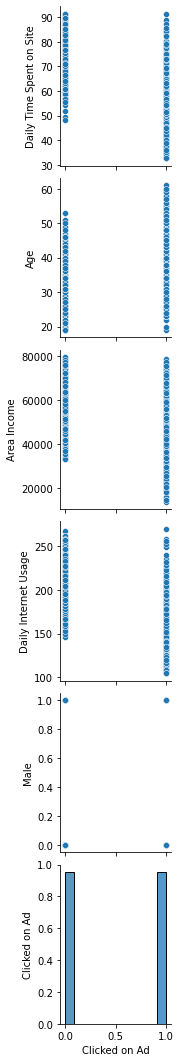

In [41]:
sns.pairplot(data=ad_data, x_vars=["Clicked on Ad"])


# Regressão Logística

Agora é hora de quebrar nossos dados em treino e teste e fitar nosso modelo.

Você terá a liberdade aqui para escolher colunas em que deseja treinar!

In [47]:
y = ad_data['Clicked on Ad']

In [53]:
X = ad_data[['Age', 'Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage', 'Male']]

**Divida os dados em conjunto de treinamento e conjunto de testes usando train_test_split**

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=101)

**Treine e ajuste um modelo de regressão logística no conjunto de treinamento.**

In [69]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(C=1e3)
logmodel.fit(X_train, y_train)

LogisticRegression(C=1000.0)

In [70]:
logmodel.coef_

array([[ 2.44589816e-01, -5.32755056e-02, -1.12466911e-05,
        -2.51794560e-02,  1.32205574e-03]])

## Previsões e avaliações
**Agora preveja valores para os dados de teste.**

In [71]:
predictions = logmodel.predict(X_test)

Text(0, 0.5, 'Predictions')

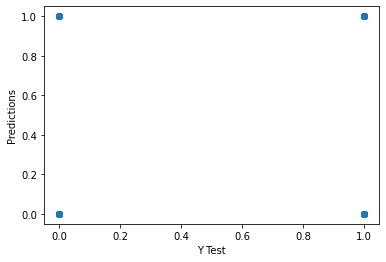

In [72]:
plt.scatter(y_test, predictions)
plt.xlabel('Y Test')
plt.ylabel('Predictions')

**Crie um relatório de classificação para o modelo.**

In [76]:
from sklearn.metrics import classification_report,confusion_matrix

print('relatório', classification_report(y_test, predictions))
print('matriz de confusão\n', confusion_matrix(y_test, predictions))

relatório               precision    recall  f1-score   support

           0       0.90      0.95      0.92       134
           1       0.94      0.88      0.91       116

    accuracy                           0.92       250
   macro avg       0.92      0.91      0.92       250
weighted avg       0.92      0.92      0.92       250

matriz de confusão
 [[127   7]
 [ 14 102]]
